In [3]:
# import all kinds of libraries for image processing
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
# import the dl libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

import sklearn as sk

2023-05-24 11:40:47.482517: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-24 11:41:06.773838: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
# Create the dataset; the folder emoji contains 3 folders: angry,happy,sad
# each of the folders contains images; we will use these images to train our model

# import the libraries for reading the images
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split


In [6]:
# load images and label them based on folder name
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        label = folder.split('/')[-1]
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            labels.append(label)
    return images, labels

In [7]:
# load
angry_images, angry_labels = load_images_from_folder('emoji/angry')
happy_images, happy_labels = load_images_from_folder('emoji/happy')
sad_images, sad_labels = load_images_from_folder('emoji/sad')

In [9]:
combined_images = angry_images + happy_images + sad_images

In [12]:
# convert the images to numpy array
X = np.array(combined_images)
y = np.array(angry_labels + happy_labels + sad_labels)

In [13]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [14]:
# create model
model = Sequential()

# add layers
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(3))
model.add(Activation('softmax'))

# compile the model
model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

2023-05-24 12:08:33.251860: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-05-24 12:08:33.331390: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [17]:
y_labels = y_train
y_test_labels = y_test

# y_train and test turn angry to class 0, happy to class 1, sad to class 2
y_train = np.where(y_train == 'angry', 0, y_train)
y_train = np.where(y_train == 'happy', 1, y_train)
y_train = np.where(y_train == 'sad', 2, y_train)

y_test = np.where(y_test == 'angry', 0, y_test)
y_test = np.where(y_test == 'happy', 1, y_test)
y_test = np.where(y_test == 'sad', 2, y_test)


In [20]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [21]:
# train model
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
4/4 [==============================] - 2s 114ms/step - loss: 126.4378 - accuracy: 0.2617 - val_loss: 37.6454 - val_accuracy: 0.6667
Epoch 2/100
4/4 [==============================] - 0s 50ms/step - loss: 24.9878 - accuracy: 0.4486 - val_loss: 47.9861 - val_accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 51ms/step - loss: 29.1578 - accuracy: 0.5234 - val_loss: 3.9883 - val_accuracy: 0.7500
Epoch 4/100
4/4 [==============================] - 0s 50ms/step - loss: 13.2191 - accuracy: 0.5981 - val_loss: 4.4739 - val_accuracy: 0.6667
Epoch 5/100
4/4 [==============================] - 0s 56ms/step - loss: 3.3786 - accuracy: 0.7103 - val_loss: 6.8925 - val_accuracy: 0.5833
Epoch 6/100
4/4 [==============================] - 0s 50ms/step - loss: 3.8330 - accuracy: 0.7477 - val_loss: 6.8148 - val_accuracy: 0.5833
Epoch 7/100
4/4 [==============================] - 0s 52ms/step - loss: 2.3657 - accuracy: 0.7850 - val_loss: 2.9761 - val_accuracy: 0.7500
Epoch 8/100


In [22]:
# accuracy on test
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 25ms/step - loss: 1.2550 - accuracy: 0.8571
Test accuracy: 0.8571428656578064


In [23]:
# take one random image from test set and predict
random_image = X_test[0]
random_image = np.expand_dims(random_image, axis=0)
predictions = model.predict(random_image)
print(predictions)

1/1 [==============================] - 0s 93ms/step
[[1.0312928e-07 5.8052069e-06 9.9999404e-01]]


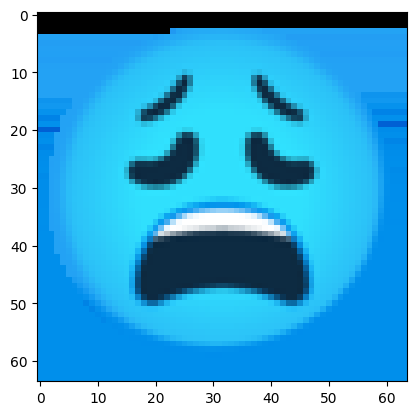

In [24]:
# show that image
plt.imshow(X_test[0])